# Prediction using Supervised ML
To Predict the percentage of marks of the students based on the number of hours they studied

# #Author: Farhana Hoque

In [9]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the dataset
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Checking if there are duplicated rows.
print('{} of data is duplicated rows'.format(
    str(round(df.duplicated().sum() / df.size * 100,5))+'%'))

0.0% of data is duplicated rows


In [5]:
# Checking  if there are Nulvalues.
print('{} of data is NuLL'.format(
    str(round(df.isna().sum().sum() / df.size * 100,3))+'%'))

0.0% of data is NuLL


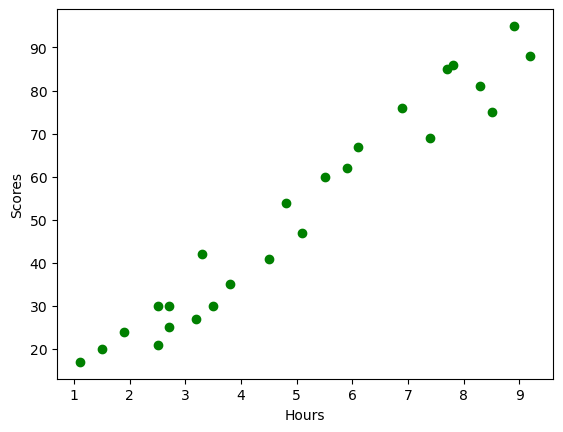

In [21]:
%matplotlib inline
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours,df.Scores,color='green',marker='o')

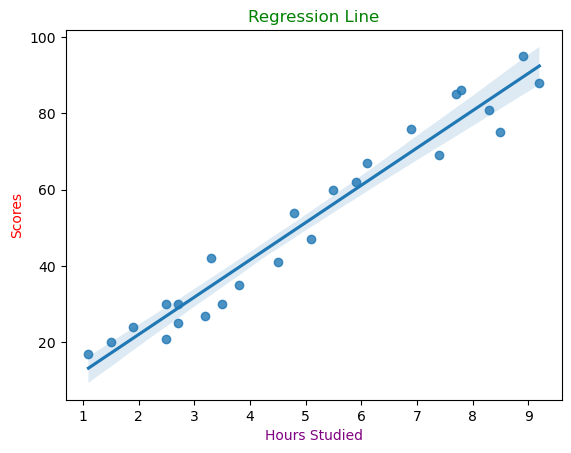

In [18]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Line',color='green')
plt.ylabel('Scores',color='red')
plt.xlabel('Hours Studied',color='purple')
plt.show()

In [24]:
new_df = df.drop('Hours',axis='columns')
new_df.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [27]:
Scores = df.Scores
Scores.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
X_train,X_test,y_train,y_test= train_test_split(X, y, random_state = 0)

print("x_train shape is:",X_train.shape)
print("x_test shape is:",X_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (18, 1)
x_test shape is: (7, 1)
y_train shape is: (18,)
y_test shape is: (7,)


In [38]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
pred_y = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [40]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


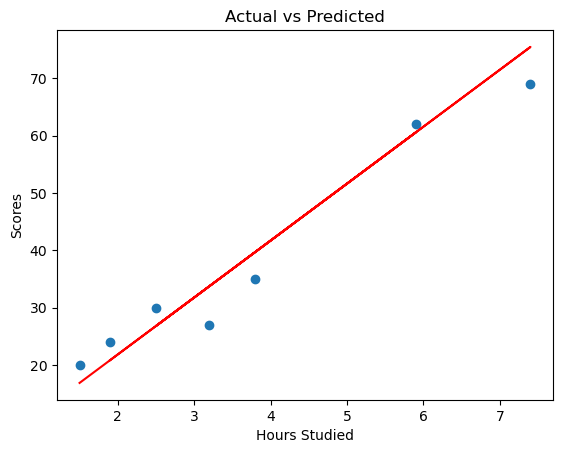

In [43]:
plt.scatter(X_test,y_test)
plt.plot(X_test, pred_y, color='red')
plt.title('Actual vs Predicted')
plt.ylabel('Scores')
plt.xlabel('Hours Studied')
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=pred_y)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=pred_y) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=pred_y,squared=False)

print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("Root Mean squared error:",rmse)

Mean absolute error: 4.130879918502486
Mean squared error: 20.33292367497997
Root Mean squared error: 4.5092043283688055


# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [45]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to my regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.